In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Classified Data",index_col=0)

In [3]:


df.head()



,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:


scaler.fit(df.drop('TARGET CLASS',axis=1))



StandardScaler()

In [7]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [8]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
pred = knn.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

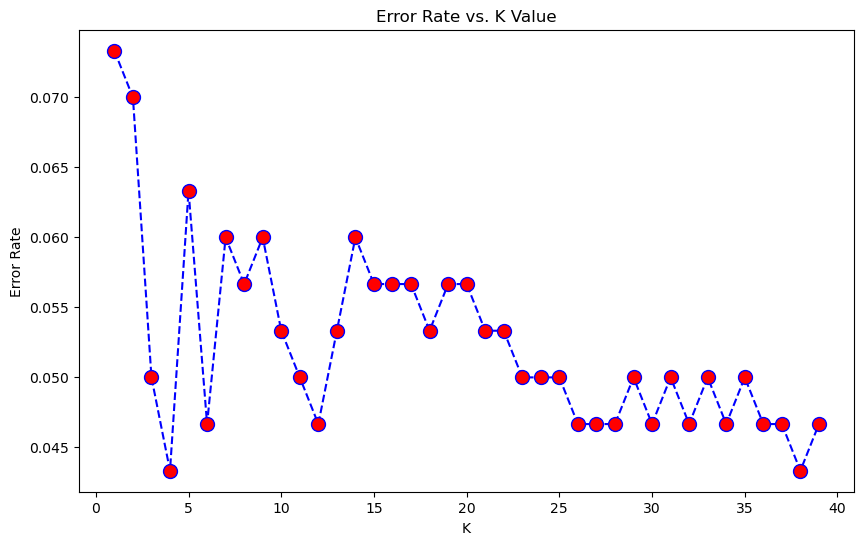

In [17]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [18]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(classification_report(y_test,pred))

WITH K=1


              precision    recall  f1-score   support

           0       0.95      0.90      0.93       155
           1       0.90      0.95      0.93       145

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [19]:
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,pred )
print("Confusion Matrix is:\n",cm)



Confusion Matrix is:
 [[140  15]
 [  7 138]]


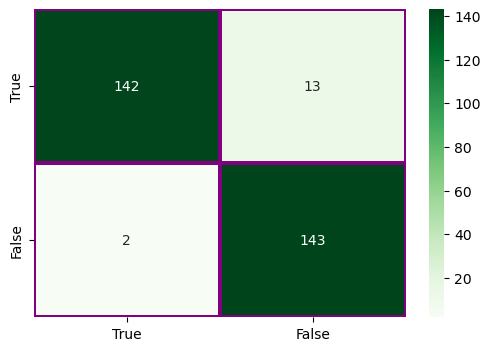

In [55]:
conf_matrix = pd.DataFrame(data = cm,
columns = ['True','False'],
index =['True','False'])
plt.figure(figsize = (6,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="purple",
linewidths=1.5)
plt.show()

In [21]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(classification_report(y_test,pred))


WITH K=1


              precision    recall  f1-score   support

           0       0.99      0.92      0.95       155
           1       0.92      0.99      0.95       145

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [22]:
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,pred )
print("Confusion Matrix is:\n",cm)

Confusion Matrix is:
 [[142  13]
 [  2 143]]


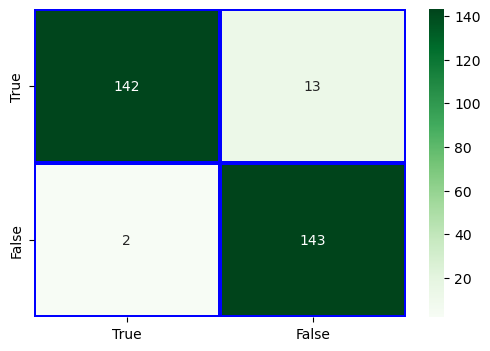

In [23]:
conf_matrix = pd.DataFrame(data = cm,
columns = ['True','False'],
index =['True','False'])
plt.figure(figsize = (6,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens", linecolor="Blue",
linewidths=1.5)
plt.show()

In [24]:
from sklearn.metrics import accuracy_score
# Calculate the accuracy
accuracy = accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.95


In [25]:
from sklearn.metrics import precision_score
# Calculate the precision
precision = precision_score(y_test, pred)
print("Precision:", precision)

Precision: 0.9166666666666666


In [26]:
from sklearn.metrics import  recall_score
# Calculate the recall
recall = recall_score(y_test, pred)
# Calculate the f1 score
# Print the results
print("Recall:", recall)

Recall: 0.9862068965517241


# HAR

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
xtrain=pd.read_table('X_train.txt',delim_whitespace=True,header=None)

In [29]:
xtest=pd.read_table('X_test.txt',delim_whitespace=True,header=None)

In [30]:
ytrain=pd.read_table('y_train.txt',header=None)

In [31]:
ytest=pd.read_table('y_test.txt',header=None)

In [32]:
#converting into array
xtrain=xtrain.values 
xtest=xtest.values
ytrain=ytrain.values
ytest=ytest.values

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [34]:
knn = KNeighborsClassifier(n_neighbors = 24) #setting k= square root of 561

In [35]:
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [36]:
print(str(accuracy_score(ytest,ypred)*100) + ' %')

90.22734984730234 %


In [37]:
#Finding the optimal model by varying the no. of neighbors
scores = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = i, n_jobs = -1)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    scores.append(accuracy_score(ytest,ypred))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

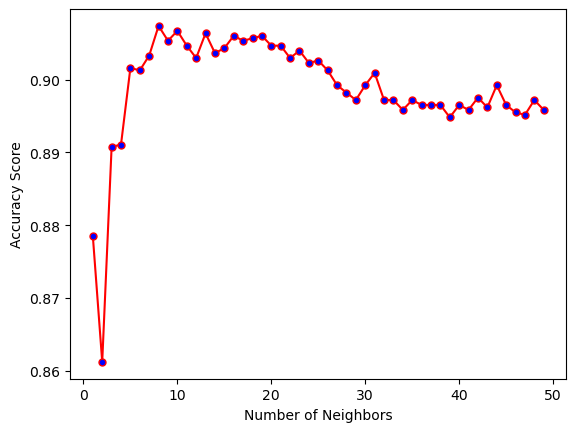

In [38]:
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
xticks = range(1,50)
plt.plot(xticks, scores, color='red', linestyle='solid', marker='o',
         markerfacecolor='blue', markersize=5)


plt.show()



In [39]:
scores = np.array(scores)

In [40]:
#Final result after training the model
print('Optimal No. Of Neighbors: ', scores.argmax()+1)
print('Accuracy Score: '+ str(scores.max()*100)+ ' %')

Optimal No. Of Neighbors:  8
Accuracy Score: 90.73634204275535 %


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
ypred = knn.predict(xtest)

In [43]:
ypred = knn.predict(xtest)

In [44]:
ypred = knn.predict(xtest)

In [45]:
ytest

array([[5],
       [5],
       [5],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
print(confusion_matrix(ytest, ypred))

[[490   0   6   0   0   0]
 [ 40 430   1   0   0   0]
 [ 63  44 313   0   0   0]
 [  0   4   0 373 114   0]
 [  0   0   0  32 500   0]
 [  0   0   0   2   1 534]]


In [48]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           1       0.83      0.99      0.90       496
           2       0.90      0.91      0.91       471
           3       0.98      0.75      0.85       420
           4       0.92      0.76      0.83       491
           5       0.81      0.94      0.87       532
           6       1.00      0.99      1.00       537

    accuracy                           0.90      2947
   macro avg       0.91      0.89      0.89      2947
weighted avg       0.90      0.90      0.89      2947



In [49]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    pred_i = knn.predict(xtest)
    
    error_rate.append(np.mean(pred_i != ytest))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

Text(0, 0.5, 'Error Rate')

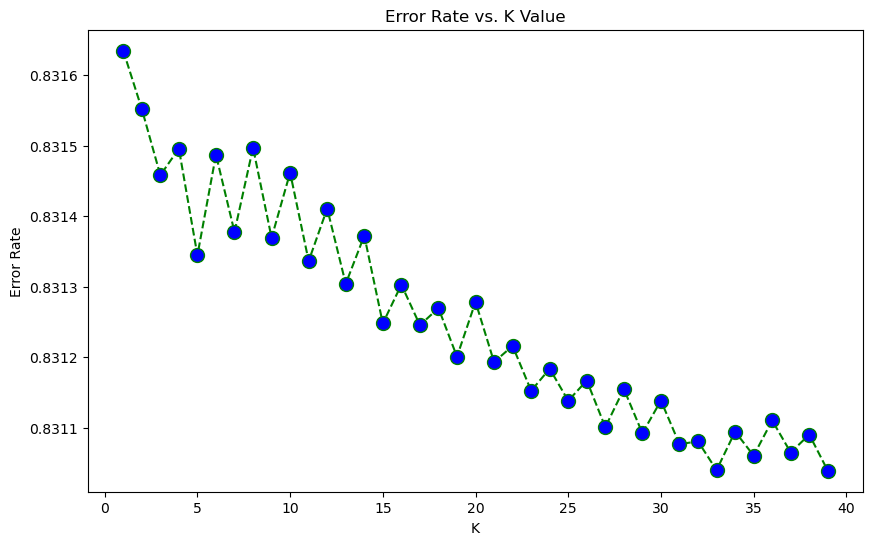

In [50]:
plt.figure(figsize=(10, 6))

plt.plot(range(1, 40), error_rate, color='green', linestyle='--', markersize=10, markerfacecolor='blue', marker='o')

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

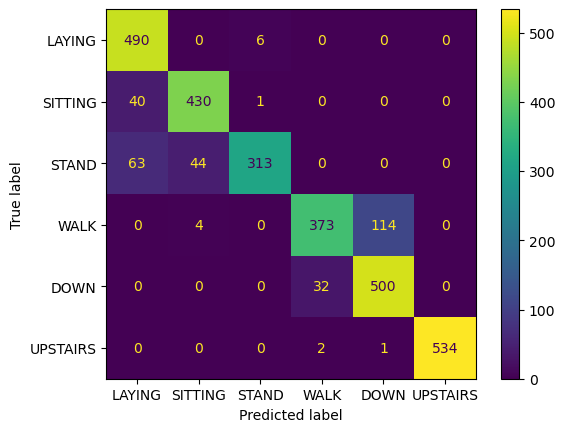

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from numpy.random import default_rng

conf_matrix =confusion_matrix(ytest, ypred)
vis=ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=['LAYING','SITTING', 'STAND', 'WALK', 'DOWN',
       'UPSTAIRS'])
vis.plot()

